<img src='https://i.imgur.com/fFHZl7V.png'>

# 1. Introduction 📑

This notebook is just me being frustrated on **deep learning** and trying to understand in "baby steps" what is going on here. For somebody that starts in this area with no background whatsoever it can be very confusing, especially because I seem to be unable to find code with many explanations and comments.

So, if you are frustrated just like I was when I started this stuff I hope the following guidelines will help you. I am by no means a teacher, but in this notebook I will:
1. Share articles/videos I watched that TRULY helped
2. Explain code along the way to the best of my ability

<div class="alert alert-block alert-warning"> 
<strong>Note</strong>: Deep learning coding is VERY different in structure than the usual <em>sklearn</em> for machine learning. In addition, it usually works with <em>images</em> and <em>text</em>, while <em>ML</em> usually works with <em>tabular</em> data. So please, be patient with yourself and if you don't understand something right away, continue reading/ coding and it will all make sense in the end.
</div>

<img src='https://i.imgur.com/tNjEyqg.png' width=500>

# 2. Before we start ✋

> This is my second notebook in the "series": **How I taught myself Deep Learning**.
1. **[How I taught myself Deep Learning: Vanilla NNs](https://www.kaggle.com/andradaolteanu/how-i-taught-myself-deep-learning-1-pytorch-fnn)**
        * PyTorch and Tensors
        * Neural Network Basics, Perceptrons and a Plain Vanilla Neural Net model
        * MNIST Classification using FNN
        * Activation Functions
        * Forward Pass
        * Backpropagation (Loss and Optimizer Functions)
        * Batching, Iterations and Epochs
        * Computing Classification Accuracy
        * Overfitting: Data Augmentation, Weight Decay, Learning Rate, Dropout() and Layer Optimization   
2. **[Recurrent Neural Networks and LSTMs Explained](https://www.kaggle.com/andradaolteanu/recurrent-neural-networks-and-lstms-explained)**
        * 1 Layer RNNs
        * Multiple Neurons RNN
        * Vanilla RNN for MNIST Classification
        * Multilayer RNNs
        * Tanh Activation Function
        * Multilayer RNN for MNIST
        * LSTMs and Vanishing Gradient Problem
        * Bidirectional LSTMs
        * LSTM for MNIST Classification        

# 3. Convolutional Neural Networks 🏕🏞🛤🏜🏖🏝🏔

> Pro Tip: Use [this tool](http://alexlenail.me/NN-SVG/LeNet.html) to create your own convolutional neural nets.

## 3.1 Why FNNs might not be the best approach 🤔
For **image** classification, Feed Forward Neural Nets are not the best approach for a number of reasons:

1. They do **not** take the 2D geometry of the image into account. This means there is no notion of **proximity**. The human eye detects features in an image locally, meaning that it looks at portions of a picture and recognizes patterns, whereas FNNs don't. Instead, 1 neuron in the Hidden layer connects with ALL pixels from the image, NO matter their position in that image.
<img src = 'https://i.imgur.com/wnADNQh.png' width=500>

2. FNNs require many connections, therefore they have many weights (parameters) to compute. For example, if we have a 100x100 pixel image => 10,000 neurons in the first layer. If the second layer has 500 neurons, then we end up with 10,000x500 = 5,000,000 weights. Hence, there is *large computing cost*.

3. FNNs are prone to overfitting. This means they learn some features very well instead of learning to generalize.

## 3.2 Youtube Videos to save you time: 🎥
Watch these 2 Youtube videos to grasp a better understanding of CNNs. 
<div class="alert alert-block alert-info">
<img src='https://i.imgur.com/H6AnLaj.png' width='70' align='left'></img>
<p><a href='https://www.youtube.com/watch?v=YRhxdVk_sIs&t=1s'>Convolutional Neural Networks explained</a></p>
<p><a href='https://www.youtube.com/watch?v=FTr3n7uBIuE&t=2201s'>Siraj Raval - CNNs - The Math of Intelligence</a></p>
</div>

## 3.3 Convolutions 

**Convolutions** solve the issues encoutered by FNNs:
* they take spatial structure into account
* they are made up by *weights* which *learn* to identify patterns and *fire* when they find one
* same *weights* are used for the *entire* image (weight sharing)
* you can specify *multiple features* in *one convolutional layer*

> So: convolutional layers have multiple filters, composed by weights, that learn patterns in the data by **sliding** over the entire image.

<img src='https://i.imgur.com/bBxtigj.png' width=500>

> Filters (like neurons in human visual cortex) in smaller layers detect edges, lines, and as the layers increase they start detecting shapes, patterns and even faces/ objects.

## 3.4 Computing a convolutional kernel 🧾🖊
Convolutional Filter == Convolutional Layer == Kernel == Filter

Feature Map == Activation Map

<img src='https://i.imgur.com/AyipjDd.png' width=500>

In [1]:
# Original Image is formed by 3 channels
# Original pixels are the sum of R + G + B
print('Original Image top left corner:', 1+0+0, '\n')

# Filters: of size 3 x 3 containing trainable weights that identify patterns
print('R Output top left corner:', 1*0 + 0*1 + 1*0 + 0*1 + 3*1 + 2*2 + 1*1 + 1*0 + 1*0)
print('G Output top left corner:', 0*1 + 3*0 + 3*2 + 0*1 + 2*1 + 4*0 + 1*0 + 2*2 + 0*0)
print('B Output top left corner:', 0*1 + 0*1 + 3*1 + 0*0 + 1*0 + 1*2 + 2*1 + 3*1 + 1*2)

Original Image top left corner: 1 

R Output top left corner: 8
G Output top left corner: 12
B Output top left corner: 12


# 4. Understanding Convolutions 🧐

Let's create some convolutions on an image sample. We'll also introduce the notions of:
* kernel_size
* stride
* padding

## 4.1 Imports and Data Preparation 📥

### Libraries 📚

In [2]:
# Imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from torchvision.datasets import MNIST
import torchvision.models # for alexnet model

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics
import seaborn as sns
import random
import os

### Seed 🌱

In [3]:
def set_seed(seed = 1234):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device available now:', device)

Device available now: cpu


Image shape: (320, 320, 3)


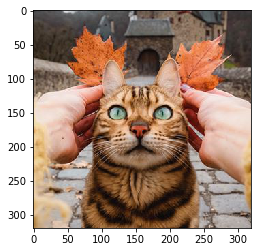

In [4]:
# Import an image example
image = plt.imread("../input/suki-image/suki.jpg")

# See Image and Shape
print('Image shape:', image.shape)
plt.imshow(image);

In [5]:
# Before aplying any convolutions we need to change the structure of the image:

# 1. Convert to Tensor
image = torch.from_numpy(image)
print('Image Tensor:', image.shape)

# 2. Bring the channel in front
image = image.permute(2, 0, 1)
print('Permuted Channel:', image.shape)

# Add 1 more dimension for batching (1 because we have only 1 image)
image = image.reshape([1, 3, 320, 320]).float()
print('Final image shape:', image.shape)

Image Tensor: torch.Size([320, 320, 3])
Permuted Channel: torch.Size([3, 320, 320])
Final image shape: torch.Size([1, 3, 320, 320])


## 4.2 Create the Convolutions: 📚

To create Convolutions you need to have:
* `in_channels`: the number of input channels (in this case 3, for MNIST data 1)
* `out_channels`: the number of output channels (any number, this is a hyperparameter that can be tuned) 
* `kernel_size`: the size of the filter (this one is a matrix of 5 by 5 => 25 weights in total)
* `padding`: the amount of pixels outside the image (used to keep the size of the image intact)
* `stride`: the amount of pixels the filter is *jumping* (this one shrinks the image in size)

> Example: original image (6x6 pixels) | kernel_size (3x3) | padding (1) | stride (2)

<img src='https://miro.medium.com/max/790/1*1okwhewf5KCtIPaFib4XaA.gif' width=200>

In [6]:
# Create 1 convolutional layer
# Padding and Stride are at default values
convolution_1 = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=5, padding=0, stride=1)

# Apply convolution to the image
conv1_image = convolution_1(image)
print('Convoluted Image shape:', conv1_image.shape)

Convoluted Image shape: torch.Size([1, 5, 316, 316])


Let's first visualize the way this convolution works:

<img src = 'https://i.imgur.com/74qU2lG.png' width = 500>

<div class="alert alert-block alert-warning"> 
<strong>Note</strong>: You can see that the Convolution alters a bit the size of the image (from 320x320 to 316x316). To compute the new image shape after each convolution use the following formula:
<p></p>
<p><strong>Output: [(W - K + 2P)/S + 1] x [(W - K + 2P)/S + 1]</strong></p>
</div>

## 4.3 Parameters (weights) of the Convolutional Layer: ⚖

**FNN**: the trainable parameters include the network weights and biases (one weight for each connection, one bias for each output unit)

**CNN**: the trainable parameters include the **convolutional kernels** (filters) and also a set of **biases**. There is one bias for each output channel. Each bias is added to *every* element in that output channel.

In [7]:
# Select Convolution Parameters
conv_params = list(convolution_1.parameters())

print("len(conv_params):", len(conv_params))   # 2 sets of parameters in total
print("Filters:", conv_params[0].shape)        # there are 5 filters for 3 channels with size 5 by 5
print("Biases:", conv_params[1].shape)         # 5 biases for each filter

len(conv_params): 2
Filters: torch.Size([5, 3, 5, 5])
Biases: torch.Size([5])


## 4.4 Visualize Convolutions 🔎

Image after Conv shape: (5, 316, 316)


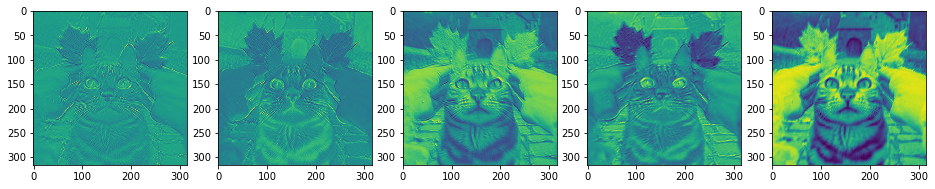

In [8]:
# Convert result to numpy
conv1_numpy_image = conv1_image.detach().numpy()

# Remove the dim 1 batch
conv1_numpy_image = conv1_numpy_image.reshape([5, 316, 316])

# Normalize to [0, 1] for plotting
maxim = np.max(conv1_numpy_image)
minim = np.min(conv1_numpy_image)

conv1_numpy_image = conv1_numpy_image - minim / (maxim - minim)

print('Image after Conv shape:', conv1_numpy_image.shape)

# Plotting the channels
plt.figure(figsize = (16, 5))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(conv1_numpy_image[i]);

## 4.5 Another Example: Increasing Padding and Stride:

In [9]:
# We'll use the same image of Suki to continue with this example
# Create another convolutional layer (a second one)
convolution_2 = nn.Conv2d(in_channels=5, out_channels=8, kernel_size=10, padding=2, stride=2)

# Apply convolution to the LAST convolution created
conv2_image = convolution_2(conv1_image)
print('Convoluted Image shape:', conv2_image.shape)

Convoluted Image shape: torch.Size([1, 8, 156, 156])


Let's visualise what has happened:

> new activation map size (remember, activation maps are the result of the filters applied to the image or another activation map): ((316 - 10 + 2x2) / 2) + 1 = 156

<img src='https://i.imgur.com/BXw3HOr.png' width=500>

Image after Conv shape: (8, 156, 156)


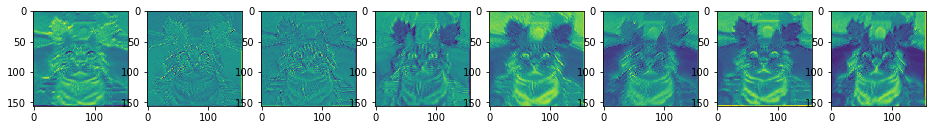

In [10]:
# Convert result to numpy
conv2_numpy_image = conv2_image.detach().numpy()

# Remove the dim 1 batch
conv2_numpy_image = conv2_numpy_image.reshape([8, 156, 156])

# Normalize to [0, 1] for plotting
maxim = np.max(conv2_numpy_image)
minim = np.min(conv2_numpy_image)

conv2_numpy_image = conv2_numpy_image - minim / (maxim - minim)

print('Image after Conv shape:', conv2_numpy_image.shape)

# Plotting the channels
plt.figure(figsize = (16, 5))

for i in range(8):
    plt.subplot(1, 8, i+1)
    plt.imshow(conv2_numpy_image[i]);

# 5. AlexNet 🎇

AlexNet is a very popular CNN architecture that is capable of achieving high accuracies in classifying 1000 different groups (animals, breeds, onjects etc.). However, removing any layer or changing any of it's parameters could drastically degrade it's performance. 

It is composed of `features` and `classifier`:
* features can be called by `alexNet.features`: it is the convolutional part of the network that identifies patterns
* classifier can be called by `alexNet.classifier`: it is the classification part which takes the last output (last activation maps) of the `features` part and takes them through a FNN to output a prediction. There are 1000 different groups in which an image can be classified.

> For more information [head here](https://towardsdatascience.com/alexnet-the-architecture-that-challenged-cnns-e406d5297951)

<img src='https://i.imgur.com/U10JIQN.png' width=500>

In [11]:
# Import alexNet
alexNet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


In [12]:
# AlexNet Structure:
alexNet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

# 6. MNIST Classification using CNNs 🔢
Finally, let's put everything into practice.

## 6.1 CNN_MNISTClassifier neural network
The Architecture will contain 2 main parts:
* the `features` part: which will take the images and put them through 2 convolutional layers that will learn features from the data
* the `classifier`: a feed forward neural net containing 2 hidden layers and 1 output layer that will classify based on the learned features the image.

> **MaxPool()** - Data is spatially autocorrelated: if a given pixel is green, an adjacent pixel is more likely to be a different tone of green than bright pink. So, to reduce computational load, after each Convolution we can call `MaxPool2d()` to **reduce the activation map size to half**. This method also introduces a degree of spatial invariance.
<img src='https://i.imgur.com/rLACtHb.png' width=200>

> **ReLU()** - It simply takes all the negative numbers in filter and turns them into 0

> So, a natural techinque during convolutions is: `Conv2d()` -> `ReLU()` -> `MaxPool()`

In [13]:
# Creating the Architecture
class CNN_MNISTClassifier(nn.Module):                         # the class inherits from nn.Module
    def __init__(self):                                       # here we define the structure of the network
        super(CNN_MNISTClassifier, self).__init__()
        
        # Convolutional Layers that learn patterns in the data
        self.features = nn.Sequential(nn.Conv2d(1, 16, 3),      # output size: (28-3+0)/1 + 1 = 26
                                      nn.ReLU(),                # activation function
                                      nn.MaxPool2d(2, 2),       # 26/2 = 13
                                      nn.Conv2d(16, 10, 3),     # output size: (13-3+0)/1 + 1 = 11
                                      nn.ReLU(),                # activation function
                                      nn.MaxPool2d(2))          # 11/2 = 5
        
        # FNN which classifies the data
        self.classifier = nn.Sequential(nn.Linear(10*5*5, 128), # 10 channels * 5 by 5 pixel output
                                        nn.ReLU(),
                                        nn.Linear(128, 84), 
                                        nn.ReLU(),
                                        nn.Linear(84, 10))      # 10 possible predictions
        
    def forward(self, image, prints=False):                     # here we take the images through the network
        if prints: print('Original Image shape:', image.shape)
        
        # Take the image through the convolutions
        image = self.features(image)
        if prints: print('Convol Image shape:', image.shape)
        
        # Reshape the output to vectorize it
        image = image.view(-1, 10*5*5)
        if prints: print('Vectorized Image shape:', image.shape)
        
        # Log Probabilities output
        out = self.classifier(image)
        if prints: print('Out:', out)
            
        # Apply softmax
        out = F.log_softmax(out, dim=1)
        if prints: print('log_softmax(out):', out)
        
        return out

## 6.2 Understanding how the Network Works: 😎

In [14]:
# Create Model Instance
model_example = CNN_MNISTClassifier()
model_example

CNN_MNISTClassifier(
  (features): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 10, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Linear(in_features=250, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [15]:
# Importing the MNIST data
mnist_example = MNIST('data', train=True, download=True, transform=transforms.ToTensor())

# Select only 1 image (index=13)
image_example, label_example = list(mnist_example)[13]

# Add 1 more dimension for batching (1 image in the batch)
image_example = image_example.reshape([1, 1, 28, 28])

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!





> How the schema of this example looks:

<img src='https://i.imgur.com/CvtWJG0.png' width=600>

In [16]:
# Print Information
print('Image Example shape:', image_example.shape, '\n' +
      'Label Example:', label_example, '\n')

# Create Log Probabilities
out = model_example(image_example, prints=True)

Image Example shape: torch.Size([1, 1, 28, 28]) 
Label Example: 6 

Original Image shape: torch.Size([1, 1, 28, 28])
Convol Image shape: torch.Size([1, 10, 5, 5])
Vectorized Image shape: torch.Size([1, 250])
Out: tensor([[ 0.1298,  0.1114, -0.0218,  0.1346,  0.0179,  0.0940,  0.1215, -0.0768,
         -0.0678,  0.1613]], grad_fn=<AddmmBackward>)
log_softmax(out): tensor([[-2.2367, -2.2552, -2.3883, -2.2319, -2.3486, -2.2725, -2.2451, -2.4433,
         -2.4344, -2.2052]], grad_fn=<LogSoftmaxBackward>)


In [17]:
# Create criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_example.parameters(), lr = 0.001, weight_decay=0.0005)

# Compute loss
# Label Example has been transformed to tensor and reshaped so it suits the requirements of function
loss = criterion(out, torch.tensor(label_example).reshape(1))
print('Loss:', loss)

# Backpropagation
# Clears all gradients
optimizer.zero_grad()
# Compute gradients with respect to the loss
loss.backward()
# Update parameters
optimizer.step()

Loss: tensor(2.2451, grad_fn=<NllLossBackward>)


## 6.3 Training on all Images: 🚀

In [18]:
# Import the train and test data
# Transforms data to Tensors using `transforms`
mnist_train = MNIST('data', train = True, download=True, transform=transforms.ToTensor())
mnist_test = MNIST('data', train = False, download=True, transform=transforms.ToTensor())

# Select only first 500 instances from each to make training fast
mnist_train = list(mnist_train)[:500]
mnist_test = list(mnist_test)[:500]

### 6.3.1 Accuracy Function: ✔

We'll use the same accuracy function used in the [How I taught myself Deep Learning: Vanilla NNs](https://www.kaggle.com/andradaolteanu/how-i-taught-myself-deep-learning-1-pytorch-fnn) notebook.

In [19]:
def get_accuracy(model, data, batchSize = 20):
    '''Iterates through data and returnes average accuracy per batch.'''
    # Sets the model in evaluation mode
    model.eval()
    
    # Creates the dataloader
    data_loader = torch.utils.data.DataLoader(data, batch_size=batchSize)
    
    correct_cases = 0
    total_cases = 0
    
    for (images, labels) in iter(data_loader):
        # Is formed by 20 images (by default) with 10 probabilities each
        out = model(images)
        # Choose maximum probability and then select only the label (not the prob number)
        prediction = out.max(dim = 1)[1]
        # First check how many are correct in the batch, then we sum then convert to integer (not tensor)
        correct_cases += (prediction == labels).sum().item()
        # Total cases
        total_cases += images.shape[0]
    
    return correct_cases / total_cases

### 6.3.2 Training Function: 💪

We'll use the same `train` function used in the [How I taught myself Deep Learning: Vanilla NNs](https://www.kaggle.com/andradaolteanu/how-i-taught-myself-deep-learning-1-pytorch-fnn) notebook (only change is that we'll create an `Adam` optimizer instead of `SGD`).

<img src='https://i.imgur.com/gGH4sLC.png' width=600>

In [20]:
def train_network(model, train_data, test_data, batchSize=20, num_epochs=1, learning_rate=0.01, weight_decay=0,
                 show_plot = True, show_acc = True):
    
    '''Trains the model and computes the average accuracy for train and test data.
    If enabled, it also shows the loss and accuracy over the iterations.'''
    
    print('Get data ready...')
    # Create dataloader for training dataset - so we can train on multiple batches
    # Shuffle after every epoch 
    train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batchSize, shuffle=True)
    
    # Create criterion and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    
    # Losses & Iterations: to keep all losses during training (for plotting)
    losses = []
    iterations = []
    # Train and test accuracies: to keep their values also (for plotting)
    train_acc = []
    test_acc = []
    
    print('Training started...')
    iteration = 0
    # Train the data multiple times
    for epoch in range(num_epochs):
        
        for images, labels in iter(train_loader):
            # Set model in training mode:
            model.train()
            
            # Create log probabilities
            out = model(images)
            # Clears the gradients from previous iteration
            optimizer.zero_grad()
            # Computes loss: how far is the prediction from the actual?
            loss = criterion(out, labels)
            # Computes gradients for neurons
            loss.backward()
            # Updates the weights
            optimizer.step()
            
            # Save information after this iteration
            iterations.append(iteration)
            iteration += 1
            losses.append(loss)
            # Compute accuracy after this epoch and save
            train_acc.append(get_accuracy(model, train_data))
            test_acc.append(get_accuracy(model, test_data))
            
    
    # Show Accuracies
    # Show the last accuracy registered
    if show_acc:
        print("Final Training Accuracy: {}".format(train_acc[-1]))
        print("Final Testing Accuracy: {}".format(test_acc[-1]))
    
    # Create plots
    if show_plot:
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        plt.title("Loss Curve")
        plt.plot(iterations[::20], losses[::20], label="Train", linewidth=4, color='#7100FF')
        plt.xlabel("Iterations")
        plt.ylabel("Loss")

        plt.subplot(1,2,2)
        plt.title("Accuracy Curve")
        plt.plot(iterations[::20], train_acc[::20], label="Train", linewidth=4, color='#FFD800')
        plt.plot(iterations[::20], test_acc[::20], label="Test", linewidth=4, color='#FF8B00')
        plt.xlabel("Iterations")
        plt.ylabel("Accuracy")
        plt.legend(loc='best')
        plt.show()

### 6.3.3 Training...

Notice there is a much higher Test Accuracy for the CNN model vs the plain Vanilla FNN in the last notebook.

Get data ready...
Training started...
Final Training Accuracy: 1.0
Final Testing Accuracy: 0.832


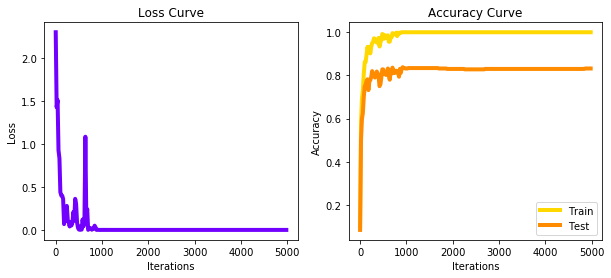

In [21]:
# Create Model Instance
model1 = CNN_MNISTClassifier()

# Train...
train_network(model1, mnist_train, mnist_test, num_epochs=200)

# Bonuses 📌

## 1. Confusion Matrix 🙃

In [22]:
def get_confusion_matrix(model, test_data):
    # First we make sure we disable Gradient Computing
    torch.no_grad()
    
    # Model in Evaluation Mode
    model.eval()
    
    preds, actuals = [], []

    for image, label in mnist_test:
        # Append 1 more dimension for batching
        image = image.reshape(1, 1, 28, 28)
        # Prediction
        out = model(image)

        prediction = torch.max(out, dim=1)[1].item()
        preds.append(prediction)
        actuals.append(label)
    
    return sklearn.metrics.confusion_matrix(preds, actuals)

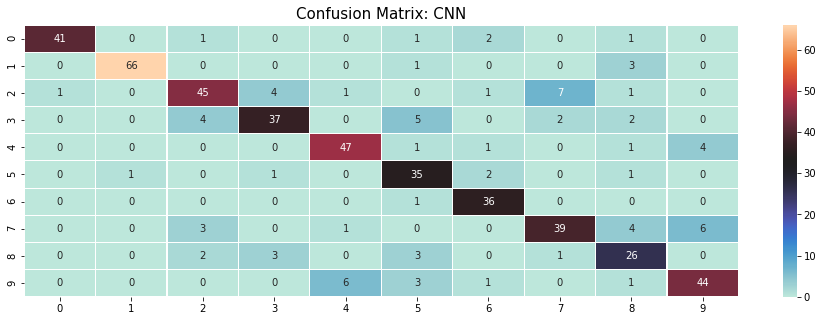

In [23]:
plt.figure(figsize=(16, 5))
sns.heatmap(get_confusion_matrix(model1, mnist_test), cmap='icefire', annot=True, linewidths=0.1,
           fmt=',')
plt.title('Confusion Matrix: CNN', fontsize=15);

## 2. 2D Visualization of Convolutional Neural Nets 💎

[Here is a very good resource to better visualize and understand MNIST Classification using CNN.](https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html)

<img src='https://i.imgur.com/InsK8sP.png' width=600>

# Other How I taught myself Deep Learning Notebooks 📒
* [How I taught myself Deep Learning: Vanilla NNs](https://www.kaggle.com/andradaolteanu/how-i-taught-myself-deep-learning-1-pytorch-fnn)
* [Recurrent Neural Networks and LSTMs Explained](https://www.kaggle.com/andradaolteanu/recurrent-neural-networks-and-lstms-explained)

If you have any questions, please do not hesitate to ask. This notebook is made to bring more clear understanding of concepts and coding, so this would also help me add, modify and improve it. 

<div class="alert alert-block alert-warning"> 
<p>If you liked this, upvote!</p>
<p>Cheers!</p>
</div>

# References: 📇
* [CNNs Explained](https://www.youtube.com/watch?v=YRhxdVk_sIs&t=1s)
* [CNNs - The math of intelligence](https://www.youtube.com/watch?v=FTr3n7uBIuE&t=2201s)
* [AlexNet](https://towardsdatascience.com/alexnet-the-architecture-that-challenged-cnns-e406d5297951)
* [Build you own neural network](http://alexlenail.me/NN-SVG/LeNet.html)
* [Visualize Convolutions in 2D - MNIST Dataset](https://www.cs.ryerson.ca/~aharley/vis/conv/flat.html)